# MNIST dataset
> <span style="color:gray">
Original [Theano/Lasagne tutorial](https://github.com/DeepLearningDTU/nvidia_deep_learning_summercamp_2016/blob/master/lab1/lab1_FFN.ipynb) by 
Lars Maaløe ([larsmaaloee](https://github.com/larsmaaloee)),
Søren Kaae Sønderby ([skaae](https://github.com/skaae)), and 
Casper Sønderby ([casperkaae](https://github.com/casperkaae)). 
Converted to TensorFlow by 
Alexander R. Johansen ([alrojo](https://github.com/alrojo)), 
and updated by 
Toke Faurby ([faur](https://github.com/Faur)) and 
Mikkel Vilstrup ([mvilstrup](https://github.com/MVilstrup)).
</span>

In this notebook we will guide you through building a neural network classifier for the (in)famous MNIST dataset.
MNIST is a dataset that is often used for benchmarking, consisting of 70.000 image-label paris of handwritten digits from 0-9.
During the notebook we have provided a program skeleton and severalt tips to help guid you through it.
Further more the task is quite similar to what you did in the previous notebook, so you should reffer to it in order to remind yourself about the implementation.

Along the way you will also learn about 
* selecting nonlinearity, and
* stochastic gradient descent with mini-batches.

We will implement a dense feedforward neural network (just like before).
In this setting we represent each image as a vector, instead of a 2D map.
We therefore lose the spatial information of the images.
The ordering of the pixels in the vector does not matter, so we could permutate all images using the same permutation and still get the same performance.
This task is therefore called the _permutation invariant_ MNIST.
Obviously this throws away a lot of structure in the data that could have been used.
Later we will see how spatial information can be included, by using the convolutional neural network architecture.


## Implementation Rules

In this exercise we want you to get some experience with setting up training for yourself, and we therefore want you to implement the training loop yourself.
You are therefore **NOT** allowed to use the `keras.models.Sequential.fit` function.
The `Sequential` model, or built in layers, such as `keras.layers.Dense` are allowed, as long as you define the training ops and training loop yourself.
(If are having problems using `keras.layers` have a look at the [Keras as a simplified interface to TensorFlow](https://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html) tutorial).


In [1]:
from __future__ import absolute_import, division, print_function 

import os
import sys
sys.path.append(os.path.join('.', '..')) 
import utils
import tensorflow as tf
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import datetime

## The MNIST dataset
The 70,000 images-label pairs are split into a 
* 55,000 images training set, 
* 5,000 images validation set and 
* 10,000 images test set.

The images are 28x28 pixels, where each pixel represents the light intensity normalised value between 0-1 (0=black, 1=white).
The number of features is therefore 28x28=784.

First let's load the MNIST dataset and plot a few examples. TensorFlow has a [convenient MNIST interface](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/learn/python/learn/datasets/mnist.py) that we will use to download and manage the data.

In [2]:
# Load data (download if you haven't already)
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets('MNIST_data', 
                                       one_hot=True,   # Convert the labels into one hot encoding
                                       dtype='float32' # rescale images to `[0, 1]`
                                      )

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Information on dataset
----------------------
Training size:	 55000
Test size	 10000
Validation size	 5000

Data summaries
Image shape		 784
Image type		 <class 'numpy.float32'>
Image min/max value	 0.0 / 1.0
Label shape		 10
Label type		 <class 'numpy.float64'>


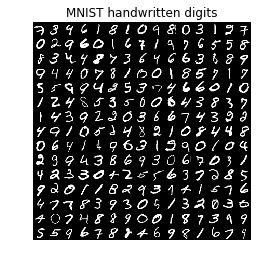

In [3]:
## Print dataset statistics and visualize
print("""Information on dataset
----------------------""")
print("Training size:\t", mnist_data.train.num_examples)
print("Test size\t", mnist_data.test.num_examples)
print("Validation size\t", mnist_data.validation.num_examples)

num_features = mnist_data.train.images[0].shape[0]
num_classes = mnist_data.train.labels[0].shape[0]

print('\nData summaries')
print("Image shape\t\t", num_features)
print("Image type\t\t", type(mnist_data.train.images[0][0]))
print("Image min/max value\t", np.min(mnist_data.train.images), '/', np.max(mnist_data.train.images))
print("Label shape\t\t", num_classes)
print("Label type\t\t", type(mnist_data.train.labels[0][0]))


## Plot a few MNIST examples
img_to_show = 15
idx = 0
canvas = np.zeros((28*img_to_show, img_to_show*28))
for i in range(img_to_show):
    for j in range(img_to_show):
        canvas[i*28:(i+1)*28, j*28:(j+1)*28] = mnist_data.train.images[idx].reshape((28, 28))
        idx += 1
plt.figure(figsize=(4,4))
plt.axis('off')
plt.imshow(canvas, cmap='gray')
plt.title('MNIST handwritten digits')
plt.show()

## EXTRA CODE TO INTIALIZE VARIABLES

num_features = num_features
num_output = num_classes

## Creating the graph

#### <span style="color:red"> EXE 1) Defining the network
</span>

In the cell below, at the place that says `### YOUR CODE HERE ###` implement the following:

* Define two layers. Remember to give them proper names.
    * Try some different nonlinearities, and compare their performance
* The non-linearity of the output layer should be softmax ([tf.nn.softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax))

<b>Solution</b>: The code has been implemented using the custom tensorflow variables and operations. In the code it can be appreciated that several nonlinear functions have been tried and the output layer has the softmax nonlinearity. There are also some hyperparameters that can be set here like the number of neurons or the training parameters.



In [4]:
## Build the network
tf.reset_default_graph()

## Define placeholders
x_pl = tf.placeholder(tf.float32, [None, num_features], name='xPlaceholder')
y_pl = tf.placeholder(tf.float64, [None, num_classes], name='yPlaceholder')
# Depending on your implementation you might need to cast y_pl differently
y_pl = tf.cast(y_pl, tf.float32)

## Define the model


## Build the network
tf.reset_default_graph()

## Define placeholders
x_pl = tf.placeholder(tf.float32, [None, num_features], name='xPlaceholder')
# y_ is a placeholder variable taking on the value of the target batch.
# This is used for computing the loss.
y_pl = tf.placeholder(tf.float64, [None, num_classes], name='yPlaceholder')
# Depending on your implementation you might need to cast y_pl differently
y_pl = tf.cast(y_pl, tf.float32)

## Define hyperparameters !
num_epochs = 10
num_hidden = 100
batch_size = 32

optimizer_choice = "RMSProp"   # Adam SGD RMSProp
learning_rate = 0.0001  # 1e-4 - 1e-5 for Adam, 0 - 1 for SGD

# Define where we want to save the TensorBoard summaries
timestr = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M")
logdir = os.path.join('.', 'logdir', timestr)

########################################################################### 
################ DEFINE INITILIZATION OF WEIGHTS  ########################  
##########################################################################
## Define initializer for the weigths
# How the weights are initialized is very important for how well the network 
# trains. We will look into this later, but for now we will just use a normal 
# distribution.
weight_initializer = tf.truncated_normal_initializer(stddev=0.1)

########################################################################### 
################ CREATE PHISICAL MODEL ################################  
##############################################################################
### Create layer 1
with tf.variable_scope('layer1'): 
    W_1 = tf.get_variable('W1', [num_features, num_hidden], 
                          initializer=weight_initializer)
    b_1 = tf.get_variable('b1', [num_hidden],
                          initializer=tf.constant_initializer(0.0))
    
    with tf.variable_scope('OutputLayer1'):
        l_1 = tf.matmul(x_pl, W_1) + b_1  # Multiplication
        # l_1 = tf.nn.relu(l_1)             # Nonlinear funciton
        l_1 = tf.nn.tanh(l_1)             # Nonlinear funciton
### Create layer 2
with tf.variable_scope('layer2'): 
    W_2 = tf.get_variable('W2', [num_hidden, num_output],
                          initializer=weight_initializer)
    b_2 = tf.get_variable('b2', [num_output], 
                          initializer=tf.constant_initializer(0.0))
    with tf.variable_scope('OutputLayer2'):
        l_2 = tf.matmul(l_1, W_2) + b_2  # Multiplication
        # The layer before the softmax should NOT have a nonlinearity

## Total output is the softmax of layer 2 !!
y = tf.nn.softmax(l_2) #


#### <span style="color:red"> EXE 2) Defining the training operations.
</span>

In the cell below, at the place that says `### YOUR CODE HERE ###` implement the following:

* Cross_entropy loss
* An optimizer and training op
* An op computing the accuracy


<b>Solution</b>: Along with the cross entropy and accuracy we have also implemented the hard_decision operation for later purposes of computing the confusion matrix and detected the wrongly classified samples. Also, the summary_loss variable is created to obtain information to plot in TensorBoard. There are 3 optimizers implemented that we can choose from.



In [5]:
### Implement training ops


################ LOSS FUNCTION ################################  
with tf.variable_scope('loss'):
    # computing cross entropy per sample
    cross_entropy = -tf.reduce_sum(y_pl * tf.log(y), reduction_indices=[1])

    # Average over samples
    # Averaging makes the loss invariant to batch size, which is very nice.
    cross_entropy = tf.reduce_mean(cross_entropy)
    

################ PERFORMANCE FUNCTION (accuracy) ################################  
# Function applied to the output at each operation, we do not use cross_entropy anymore for this.
# Just the hard classificaiton error.
with tf.variable_scope('performance'):
    # making a one-hot encoded vector of correct (1) and incorrect (0) predictions
    correct_prediction = tf.equal(tf.argmax(y, axis=1), tf.argmax(y_pl, axis=1))

    # averaging the one-hot encoded vector
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.variable_scope('hard_decision'):
    hard_dec = tf.argmax(y_pl, axis=1)

summary_loss = tf.summary.scalar("performance/loss", cross_entropy)


########################################################################### 
################ DEFINE TRAINING !! ########################  
##########################################################################
    
################ OPTIMIZER ################################  
if (optimizer_choice == "SGD"):
    with tf.variable_scope('trainOP_GradientDescent'):
        # Defining our optimizer
        optimizer_GD = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
        # Computing our gradients
        grads_and_vars_GD = optimizer_GD.compute_gradients(cross_entropy)
        # Applying the gradients
        train_op_GD = optimizer_GD.apply_gradients(grads_and_vars_GD)
        
        ## The three steps above can be compressed into one: 
        # train_op = optimizer_GD.minimize(crossentropy)
elif(optimizer_choice == "Adam"):
    with tf.variable_scope('trainOP_ADAM'):
        # Defining our optimizer
        optimizer_Adam = tf.train.AdamOptimizer(   learning_rate=learning_rate,
                                           beta1=0.9,beta2=0.999,epsilon=1e-08,name='Adam' )
        # Computing our gradients
        grads_and_vars_Adam = optimizer_Adam.compute_gradients(loss = cross_entropy,
            var_list=None, aggregation_method=None, colocate_gradients_with_ops=False, grad_loss=None)
    
        # Applying the gradients
        train_op_Adam = optimizer_Adam.apply_gradients(grads_and_vars_Adam)
elif(optimizer_choice == "RMSProp"):
    with tf.variable_scope('trainOP_RMSProp'):
        # Defining our optimizer
        optimizer_RMSProp = tf.train.RMSPropOptimizer(   learning_rate=learning_rate,
        decay=0.9, momentum=0.0, epsilon=1e-10,use_locking=False,  centered=False, name='RMSProp')
        # Computing our gradients
        grads_and_vars_RMSProp = optimizer_RMSProp.compute_gradients(loss = cross_entropy,
            var_list=None, aggregation_method=None, colocate_gradients_with_ops=False, grad_loss=None)
    
        # Applying the gradients
        train_op_RMSProp = optimizer_RMSProp.apply_gradients(grads_and_vars_RMSProp)
    
if (optimizer_choice == "SGD"):
    train_op = train_op_GD
elif(optimizer_choice == "Adam"):
    train_op = train_op_Adam
elif(optimizer_choice == "RMSProp"):
    train_op = train_op_RMSProp

########################################################################### 
################ PREDICTOR OF THE SYSTEM ################################  
def pred(X_in, sess):
    # first we must define what data to give it
    feed_dict = {x_pl: X_in}
    # secondly our fetches
    fetches = [y]
    # utilizing the given session (ref. sess) to compute results
    res = sess.run(fetches, feed_dict)
    # res is a list with each indices representing the corresponding element in fetches
    return res[0]

def hard_decision(Y_in, sess):
    # first we must define what data to give it
    feed_dict = {y_pl: Y_in}
    # secondly our fetches
    fetches = [hard_dec]
    # utilizing the given session (ref. sess) to compute results
    res = sess.run(fetches, feed_dict)
    # res is a list with each indices representing the corresponding element in fetches
    return res[0]

### Stochastic gradient descent with mini-batches

In the last notebook we used the entire dataset to compute every parameter update.
For large datasets this is very costly and inefficient.
Instead we can compute the gradient on only a small subset of the data, a *mini-batches*, and use it to update the parameters.
Bath size varies a lot depending on application but between 8-256 is common.
Bigger is not allways better.
With smaller mini-batch size you get more updates and your model might converge faster.
Also small batchsizes uses less memory -> freeing up memory so you train a model with more parameters.

#### <span style="color:red"> EXE 3) Testing the forward pass
</span>

Before building the training loop lets ensure that the forward pass works.

In the cell below, at the place that says `### YOUR CODE HERE ###` implement the following:

* define the `feed_dict`
* pass `x` through the network using `sess.run`

In [7]:
#Test the forward pass
batch_size = 32

# Get a mini-batch
x_b, y_b = mnist_data.train.next_batch(batch_size)

# Restricting memory usage, TensorFlow is greedy and will use all memory otherwise
gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:
    sess.run(tf.global_variables_initializer())

    feed_dict = {x_pl: x_b, y_pl: y_b}

    # deciding which parts to fetch, train_op makes the classifier "train"
    fetches= [y]

    # running the train_op
    y_pred = sess.run(fetches=fetches, feed_dict=feed_dict)
    y_pred = y_pred[0]

assert y_pred.shape == y_b.shape, "ERROR the output shape is not as expected!" \
        + " Output shape should be " + str(y_b.shape) + ' but was ' + str(y_pred.shape)

# Build the training loop.
We train the network by calculating the gradient w.r.t the cost function and update the parameters in direction of the negative gradient. 


When training neural network you always use mini batches.
Instead of calculating the average gradient using the entire dataset you approximate the gradient using a mini-batch of typically 16 to 256 samples.
The paramters are updated after each mini batch.
Networks converges much faster using minibatches because the paramters are updated more often.



#### <span style="color:red"> EXE 4) Building the training loop.
</span>

In the cell below, at the place that says `### YOUR CODE HERE ###` implement the following:

* Perform the training operation
* Collect training statistics
* [Optional] Monitor training in TensorBoard.

<b>Solution</b>: The training using minibatches is implemented below. We colect the specified training statistics and also write the TensorBoard summary. The confusion matrix is computed at the end to analyze it later. One can change the hyperparameters to tune the training, the ones left now are not the optimal but show a decent solution in a short amount of time.

In [8]:
## SETTING CONFIGURATION OF TENSORFLOW

num_epochs = 100
# restricting memory usage, TensorFlow is greedy and will use all memory otherwise
gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
# Initilize variables to use
train_cost, val_cost, train_acc, val_acc = [],[],[],[]

X_val = mnist_data.test.images
y_val = mnist_data.test.labels
X_tr = mnist_data.train.images
y_tr = mnist_data.train.labels
# Start the session to start our system !

aux_epochs_completed = 0
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:
    try:
        print('Begin training')
        # initializing all variables 
        init = tf.global_variables_initializer()
        sess.run(init)

        tmp_def = utils.rename_nodes(sess.graph_def, lambda s:"/".join(s.split('_',1)))

        # We use two summary writers. This is a hack that allows us to write 
        # show two plots in the same fiigure in TensorBoard
        summary_writer_train = tf.summary.FileWriter(os.path.join(logdir, 'train'), sess.graph)
        summary_writer_valid = tf.summary.FileWriter(os.path.join(logdir, 'valid'), sess.graph)


        for epoch in range(num_epochs):
            avg_cost = 0.
            total_batch = int(mnist_data.train.num_examples/batch_size)

            # Loop over all batches
            for i in range(total_batch):
                # Load one mini-batch
                x_b, y_b = mnist_data.train.next_batch(batch_size)
                ### TRAINING All the minibatches of the epoch###
                feed_dict_train = {x_pl: x_b, y_pl: y_b}
                # deciding which parts to fetch, train_op makes the classifier "train"
                fetches_train = [train_op]
                 # running the train_op
                res = sess.run(fetches=fetches_train, feed_dict=feed_dict_train)

            ############ Once the Epoch is finished ########

            # Now we do the forward for both train and test with all the data to compute statiscs.
            feed_dict_train = {x_pl: X_tr, y_pl: y_tr}
            fetches_train = [ cross_entropy, accuracy, summary_loss]
            res = sess.run(fetches=fetches_train, feed_dict=feed_dict_train)

            # storing cross entropy (second fetch argument, so index=1)
            train_cost += [res[0]]
            train_acc += [res[1]]
            summary_train = res[2]
            ### VALIDATING ###
            feed_dict_valid = {x_pl: X_val, y_pl: y_val}
            fetches_valid = [cross_entropy, accuracy, summary_loss]
            res = sess.run(fetches=fetches_valid, feed_dict=feed_dict_valid)

            val_cost += [res[0]]
            val_acc += [res[1]]
            summary_valid = res[2]
            ##### Write the summaries ############

            summary_writer_train.add_summary(summary_train, epoch)
            summary_writer_valid.add_summary(summary_valid, epoch)

            if epoch % 2 == 0:
                print("Epoch %i, Train Cost: %0.3f\tVal Cost: %0.3f\t Val acc: %0.3f" \
                      %(epoch, train_cost[-1],val_cost[-1],val_acc[-1]))

        ################### GET SOME OF THE FINAL PREDICTED IMAGES ###################
        validation_predicted = pred(X_val,sess)  # Predicted validation of all samples

         # Predicted validation of a sample
        indx = 12
        validation_predicted_indx = pred(X_val[[indx],:],sess)
        y_val_hard = hard_decision(y_val, sess)
        y_pred_hard =  hard_decision(validation_predicted, sess)

        ### CREATE THE CONFUSION MATRIX !!
        class_names = [str(x) for x in range(10)]
        confusionMatrix = utils.ConfusionMatrix(10,class_names)
        confusionMatrix.batch_add(y_val_hard,y_pred_hard)

    except KeyboardInterrupt:
        print('KeyboardInterrupt')
print('Done')

Begin training
Epoch 0, Train Cost: 0.410	Val Cost: 0.396	 Val acc: 0.899
Epoch 2, Train Cost: 0.272	Val Cost: 0.265	 Val acc: 0.923
Epoch 4, Train Cost: 0.227	Val Cost: 0.223	 Val acc: 0.935
Epoch 6, Train Cost: 0.197	Val Cost: 0.196	 Val acc: 0.942
Epoch 8, Train Cost: 0.174	Val Cost: 0.175	 Val acc: 0.949
Epoch 10, Train Cost: 0.157	Val Cost: 0.161	 Val acc: 0.953
Epoch 12, Train Cost: 0.142	Val Cost: 0.148	 Val acc: 0.956
Epoch 14, Train Cost: 0.130	Val Cost: 0.138	 Val acc: 0.958
Epoch 16, Train Cost: 0.121	Val Cost: 0.131	 Val acc: 0.961
Epoch 18, Train Cost: 0.112	Val Cost: 0.124	 Val acc: 0.963
Epoch 20, Train Cost: 0.104	Val Cost: 0.117	 Val acc: 0.965
Epoch 22, Train Cost: 0.098	Val Cost: 0.112	 Val acc: 0.966
Epoch 24, Train Cost: 0.092	Val Cost: 0.109	 Val acc: 0.967
Epoch 26, Train Cost: 0.087	Val Cost: 0.105	 Val acc: 0.968
Epoch 28, Train Cost: 0.082	Val Cost: 0.102	 Val acc: 0.970
Epoch 30, Train Cost: 0.078	Val Cost: 0.099	 Val acc: 0.970
Epoch 32, Train Cost: 0.074	Va

#### <span style="color:red"> EXE 5) Building the training loop.
</span>

You should have saved training statistics in `train_cost`, `val_cost`, `train_acc`, `val_acc`.
1. Plot train and validation loss as a function of time
2. Plot train and validation accuracy as a function of time
3. Select some random validation images, visualize them, and examine the output of the network.
    * How well does it do? When does it make mistakes?

<b>Solution</b>: We can see in the training and validation curves that the accuarary increases with the epochs and the loss function decreases, this should be the normal behaviour of the training. After a few epochs the training accuracy and loss function are better than the validation ones, which end up in saturation after a few more epochs, meaning that some overfitting is taking place, but we have not run enough epochs for the validation accuracy to go down so the overfitting is not negatively affecting the validation samples.

In the confusion matrix plotted we can see that most of the erros come from mistaken numbers that are visualy close, such as 0 and 6 which can be mistaken if the circle of the six is too big and the branch too small. Also 9 and 4 are confused often.

In the examples of the validation images we can see the image and the discrete distribution of the output of the network. We have chosen those images that we wrongly classified. For some reason, the plot is not seen properly in the notebook for more than one image, but it works fine in a normal python script. We can see for example for this execution how the 8 is confused with a 2, being the probability of being an 8, 0.3, and the probability of being a 2, 0.3. The network is not fine tuned and final accuracy is aroun 98% for the validation so these errors are expected to happen.


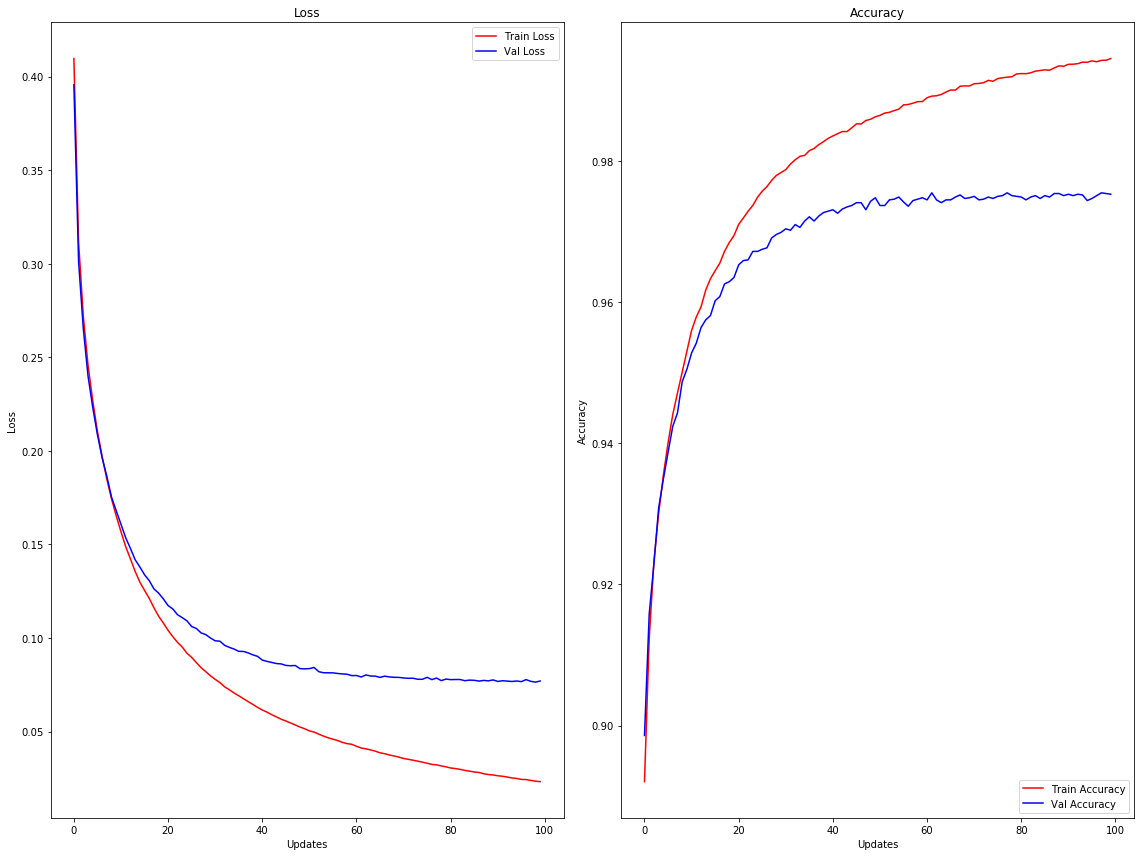

In [9]:
epoch = np.arange(len(train_cost))

fig = plt.figure(figsize=(16,12))
fig.add_subplot(121)
plt.title('Loss')
plt.plot(epoch, train_cost,'r', label='Train Loss')
plt.plot(epoch, val_cost,'b', label='Val Loss')
plt.legend()
plt.xlabel('Updates'), plt.ylabel('Loss')

fig.add_subplot(122)
plt.title('Accuracy')
plt.plot(epoch, train_acc,'r', label='Train Accuracy')
plt.plot(epoch, val_acc,'b', label='Val Accuracy')
plt.legend(loc=4)
plt.xlabel('Updates'), plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [10]:
############### GET THE CONFUSION MATRIX ###########################
confusionMatrix.sensitivity()
print (str(confusionMatrix))


  ------------------------------------------------
 0 |  970    0    2    0    1    2    1    2    2    0 |980
 1 |    0 1123    5    0    0    1    2    1    3    0 |1135
 2 |    4    0 1002    1    5    1    2    6   11    0 |1032
 3 |    0    0    4  989    1    3    0    7    2    4 |1010
 4 |    1    0    1    0  962    0    4    3    2    9 |982
 5 |    2    0    1   13    3  860    6    2    4    1 |892
 6 |    6    2    4    0    2    7  933    0    4    0 |958
 7 |    1    2   13    5    1    0    0 1000    1    5 |1028
 8 |    3    1    7    4    3    5    1    4  943    3 |974
 9 |    2    3    2    6    8    5    0    9    3  971 |1009
  ------------------------------------------------
     989 1131 1041 1018 986 884 949 1034 975 993



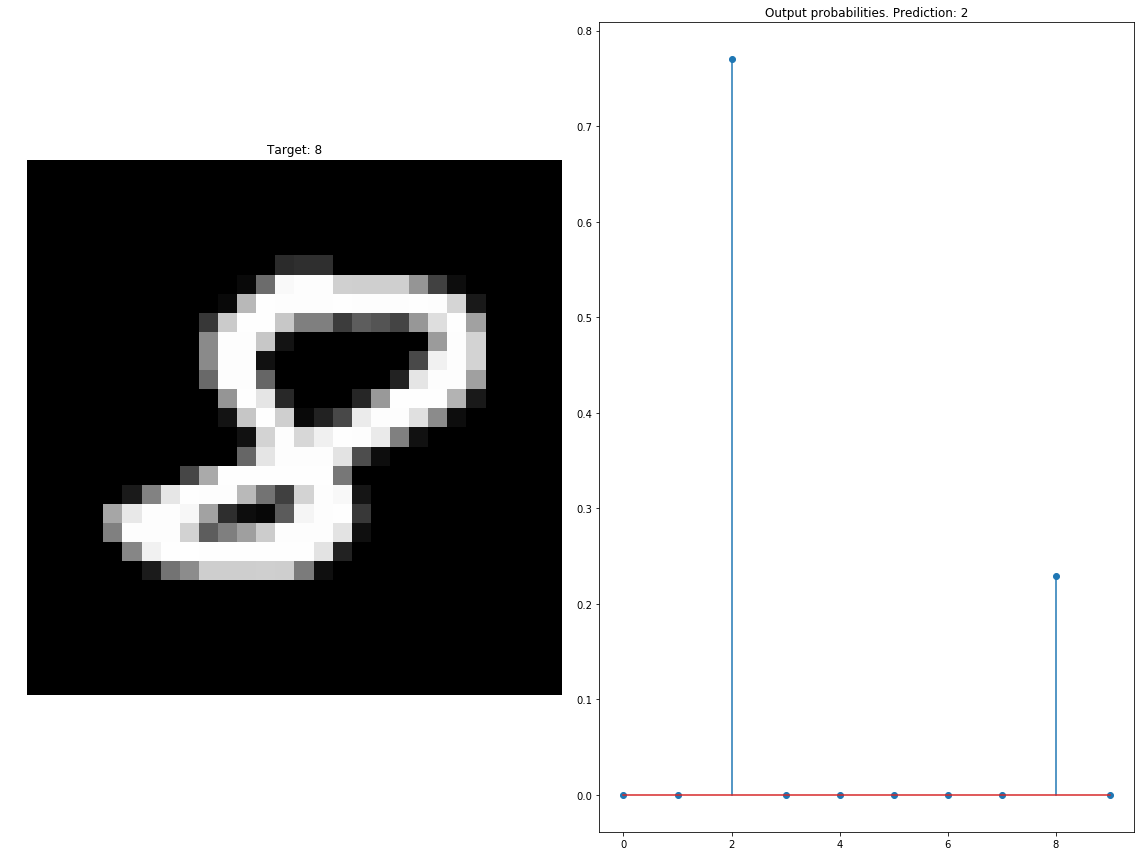

In [11]:

###### PRINT SOME FAILING IMAGES #########################
## Plot a few MNIST examples
n_fails_plot = 1
indexes_fail = []

i = 0
while(len(indexes_fail) < n_fails_plot):
    if(y_val_hard[i] != y_pred_hard[i]):
        indexes_fail.append(i)
    i+= 1


fig = plt.figure(figsize=(16,12))

for i in range(n_fails_plot):

    indx_fail = indexes_fail[i]
    
    fig.add_subplot(n_fails_plot, 2, 2*i+1)
    canvas = X_val[indx_fail].reshape((28, 28))

    plt.axis('off')
    plt.imshow(canvas, cmap='gray')
    plt.title("Target: %s"%str(y_val_hard[indx_fail]))

    fig.add_subplot(n_fails_plot, 2, 2*i+2)
    plt.title("Output probabilities. Prediction: %s"%str(y_pred_hard[indx_fail]))

    plt.stem(validation_predicted[indx_fail].flatten().tolist())
    plt.tight_layout()
    plt.show()



# Closing Remarks

You have now seen several different ways in which feed forward neural networks can be created.
There is no "right" way to define a neural network.
Ideally you should be able to understand how to implement everything at a low-level, and use high-level APIs to reduce human error and speedup development.
There are numerous frameworks which takes care the fundamental concepts are implemented correctly.
In this class we will mostly use Tensorflow and show Keras implementations here and there.
There are however alternatives that each have their strenghts and weaknesses: 
- [Pytorch](http://pytorch.org/)
- [Theano](http://deeplearning.net/software/theano/)
- [CNTK](https://github.com/Microsoft/CNTK)
- [Chainer](https://github.com/chainer/chainer)
- ... etc.

There is no framework that is "better" than the others.
However, each has their particular focus.
Keras tries to be the easiest to use and takes the most "High-level" approach to Deep Learning.
This might be useful at times, however, at others you might want to have more flexibility than such a High-level framework can provide. 

As you will see, FFNs are just one of many types of architectures and from here we will take a look at the extremely useful alternative called Convolutional Neural Networks. 

# Exercise from the book
#### <span style="color:red"> EXE 5) Building the training loop.
</span>

I explained gradient descent when C is a function of two variables, and when it's a function of more than two variables. What happens when C is a function of just one variable? Can you provide a geometric interpretation of what gradient descent is doing in the one-dimensional case?

<b>Solution</b>: In this case, the gradient becomes a vectorized version of the derivative, which can be considered the slope at that point. This slope would be the rate of change of the Error when we increase the parameter (weight or bias). Which by Taylors expansion is an approximation of order 1 of the function at that point. In this case, gradient descent is modifying the parameter going downhill of the slope (gradient) obtained. If the slope is positive then we move to the left thus decreasing the estimation of the function, if the slope is negative we move forward, also decreasing it.
